## Exercise 1: Part of the argument that the $K$-means clustering algorithm 10.1 reaches a local optimum

## a. Proving identity (10.12)

We'll prove this for the case $p = 1$, from which the result follows easily by induction. 

Starting with the left-hand side of (10.12), we have

$$
\begin{align}
\frac{1}{|C_k|}\sum_{i, i' \in C_k} (x_i - x_{i'})^2 &= \frac{1}{|C_k|}\sum_{i \neq i' \in C_k} (x_i - x_{i'})^2\\
& = \frac{2}{|C_k|}\sum_{i < i'} (x_i - x_{i'})^2
\end{align}
$$

Now, we work with the right-hand side. 

$$
\begin{align}
2\sum_{i  \in C_k} (x_i - \overline{x}_k)^2 &= 2 \sum_{i  \in C_k} \left(x_i - \frac{1}{|C_k|}\sum_{i' \in C_k} x_{i'}\right)^2\\
&= \frac{2}{N^2} \sum_{i } \left((N - 1)x_i - \sum_{i' \neq i} x_{i'}\right)^2\\
\end{align}
$$

Where we have let $N = |C_k|$ for readability.

Furthermore

$$
\begin{align}
& \left((N - 1)x_i - \sum_{i' \neq i} x_{i'}\right)^2 \\
&= (N - 1)^2 x_i^2 - \sum_{i' \neq i} 2(N - 1)x_ix_{i'} + \sum_{i' \neq i} x_{i'}^2 + \sum_{i', i''\neq i} 2 x_{i'} x_{i''}
\end{align}
$$

Thus (4) becomes

$$
\begin{align}
& \frac{2}{N^2}\sum_i \left((N - 1)^2 x_i^2 + \sum_{i' \neq i} 2(N - 1)x_ix_{i'} + \sum_{i' \neq i} x_{i'}^2 + \sum_{i', i''\neq i} 2 x_{i'}
x_{i''}\right)\\
&= \frac{2}{N^2}\sum_{i < i'}\Bigg((N - 1)^2 x_i^2  - 2(N - 1)x_ix_{i'} + (N - 1) x_i^2 + 2x_i x_{i'}\Bigg)\\
&= \frac{2}{N^2}\sum_{i < i'} \Bigg(N(N - 1)x_{i}^2 - 2Nx_ix_{i'}\Bigg)\\
&= \frac{2}{N^2}\sum_{i < i'} \Bigg(N x_{i}^2 - 2Nx_ix_{i'} + Nx_{i'}^2\Bigg)\\
&= \frac{2}{N^2}(N)\sum_{i < i'} \Bigg(x_{i}^2 - 2x_ix_{i'} + x_{i'}^2\Bigg)\\
&= \frac{2}{|C_k|}\sum_{i < i'} \left(x_{i} - x_{i'}\right)^2
\end{align}
$$

And (12) is the same as (2)

## b. Arguing the algorithm decreases the objective

The identity (10.12) shows that the objective (10.11) is equal to 

$$
\begin{equation}
\sum_{k =1}^K \left(2\sum_{i\in C_k} ||x_i - \mu_{k}||^2\right)
\end{equation}
$$

where $\mu_k = (\overline{x}_{k1}, \dots, \overline{x}_{kp})$ is the $k$-th cluster centroid.

At each iteration of the algorithm, observations $x_i$ are reassigned to the cluster $k$ whose centroid is closest, i.e. such that $|| x_i - \mu_k ||^2$ is minimal over $k$. That is, if $k_m$ denotes the cluster assigned to observation $x_i$ on iteration $m$, and $\mu_{k_m}$ the centroid of cluster $x_m$ then 

$$ || x_i - \mu_{k_{m + 1}} ||^2 \leqslant || x_i - \mu_{k_{m}} ||^2 $$

for all $i$. Thus (1) decreases at each iteration.

## Exercise 2: Sketching a dendrogram

## a. Complete linkage dendrogram

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
import numpy as np

In [2]:
dist_sq = np.array([[0, 0.3, 0.4, 0.7], [0.3, 0, 0.5, 0.8],
                       [0.4, 0.5, 0, 0.45], [0.7, 0.8, 0.45, 0]])
y = squareform(dist_sq)

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0]],
 'dcoord': [[0.0, 0.3, 0.3, 0.0],
  [0.0, 0.45, 0.45, 0.0],
  [0.3, 0.8, 0.8, 0.45]],
 'ivl': ['x1', 'x2', 'x3', 'x4'],
 'leaves': [0, 1, 2, 3],
 'color_list': ['g', 'r', 'b']}

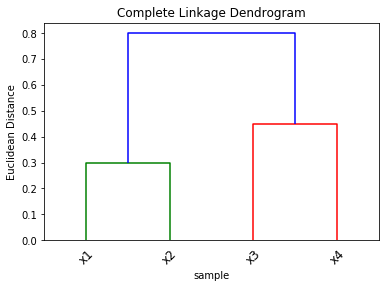

In [3]:
Z = linkage(y, method='complete', metric='Euclidean')
plt.title('Complete Linkage Dendrogram')
plt.xlabel('sample')
plt.ylabel('Euclidean Distance')
dendrogram(Z, labels=['x1', 'x2', 'x3', 'x4'], leaf_rotation=45)

## b. Single linkage dendrogram

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5]],
 'dcoord': [[0.0, 0.3, 0.3, 0.0],
  [0.0, 0.4, 0.4, 0.3],
  [0.0, 0.45, 0.45, 0.4]],
 'ivl': ['x4', 'x3', 'x1', 'x2'],
 'leaves': [3, 2, 0, 1],
 'color_list': ['g', 'b', 'b']}

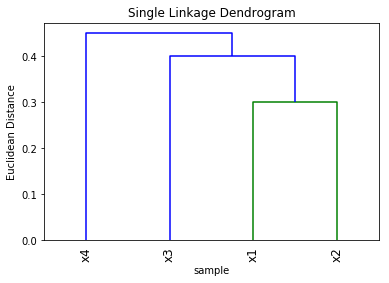

In [4]:
Z = linkage(y, method='single', metric='Euclidean')
plt.title('Single Linkage Dendrogram')
plt.xlabel('sample')
plt.ylabel('Euclidean Distance')
dendrogram(Z, labels=['x1', 'x2', 'x3', 'x4'], leaf_rotation=90)

## c.  Clusters from the complete linkage dendrogram

The clusters are

$$\{x_1, x_2\}, \{x_3, x_4\}$$

## d. 

The clusters are

$$\{x_1, x_2, x_3\}, \{x_4\}$$

## e. 

Just exchange $ x_1 \mapsto x_3, x_2 \mapsto x_4$ in the diagram in part [a.](#a.-Complete-linkage-dendrogram)

## Exercise 3: Manual example of $K$-means clustering for $K=2$, $n=6$, $p=2$. 

In [5]:
import pandas as pd
import seaborn as sns; sns.set_style('whitegrid')

df = pd.DataFrame({'X1': [1, 1, 0, 5, 6, 4], 'X2': [4, 3, 4, 1, 2, 0]},
                    index=range(1, 7))
df

,X1,X2
1,1,4
2,1,3
3,0,4
4,5,1
5,6,2
6,4,0


### a. Plot the observations

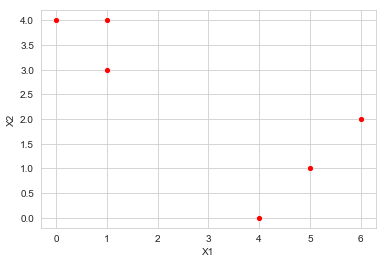

In [6]:
sns.scatterplot(x='X1', y='X2', data=df, color='r')

### b. Initialize with random cluster assignment

In [7]:
np.random.seed(33)
df['cluster'] = np.random.choice([1, 2], replace=True, size=6)
df['cluster']

1    1
2    2
3    1
4    1
5    1
6    2
Name: cluster, dtype: int64

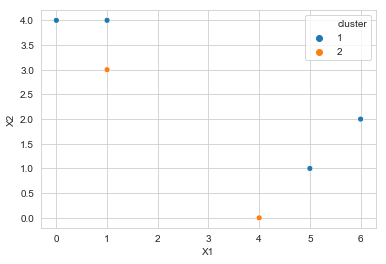

In [8]:
sns.scatterplot(x='X1', y='X2', data=df, hue='cluster', legend='full', 
                palette=sns.color_palette(n_colors=2))

### c. Compute the centroid for each cluster

In [9]:
def get_centroids(df):
    # compute centroids
    c1, c2 = df[df['cluster'] == 1], df[df['cluster'] == 2]
    cent_1 = [c1['X1'].mean(), c1['X2'].mean()]
    cent_2 = [c2['X1'].mean(), c2['X2'].mean()]

    return (cent_1, cent_2)

In [10]:
cent_1, cent_2 = get_centroids(df)

### d. Assign observations to clusters by centroid

In [11]:
def d_cent(cent):
    def f(x):
        return np.linalg.norm(x - cent)
    return f


def assign_to_centroid(cent_1, cent_2):
    def f(x):
        d_1, d_2 = d_cent(cent_1)(x), d_cent(cent_2)(x)
        return 1 if d_1 < d_2 else 2
    return f

def assign_to_clusters(df):
    cent_1, cent_2 = get_centroids(df)
    df = df.drop(columns=['cluster'])
    return df.apply(assign_to_centroid(cent_1, cent_2), axis=1)

In [12]:
assign_to_clusters(df)

1    1
2    1
3    1
4    2
5    1
6    2
dtype: int64

### e. Iterate (c), (d) until cluster assignments are stable

In [13]:
def get_final_clusters(df):
    cl_before, cl_after = df['cluster'], assign_to_clusters(df)
    while not (cl_before == cl_after).any():
        df.loc[:, 'cluster'] = cl_after
        get_final_clusters(df)
    return cl_after

In [14]:
get_final_clusters(df)

1    1
2    1
3    1
4    2
5    1
6    2
dtype: int64

### f. Plot clusters

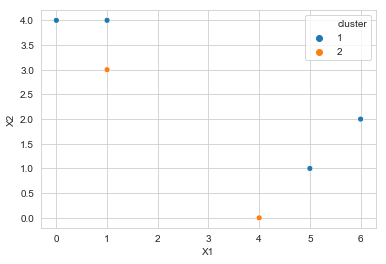

In [15]:
sns.scatterplot(x='X1', y='X2', data=df, hue='cluster', legend='full',
                palette=sns.color_palette(n_colors=2))

## Exercise 4: Comparing single and complete linkage

### a. For clusters $\{1, 2, 3\}$ and $\{4, 5\}$.

In both linkage diagrams, the clusters $A = \{1, 2, 3\}$ and $B = \{4, 5\}$ fuse when they are the most similar pair of clusters among all pairs at that height.

In the simple linkage diagram, this occurs at the height $h_{sing}(A, B)$ when the *minimum* dissimilarity $d(a, b)$ over pairs $(a, b) \in A \times B$ is less than for any other clusters $C$.
In the complete linkage diagram, this occurs at the height $h_{comp}(A, B)$ when the *maximum* dissimilarity over pairs $d(a, b) \in A \times B$ is less than for any other clusters $C$.

It is possible to have the maximum over other clusters $C$ less than or equal to the minimum, and vice versa. In the former case, $h_{comp} <= h_{sing}$ and in the latter, $h_{comp} >= h_{sing}$. So there is not enough information to tell.

To make this argument a bit more concrete here are some examples:

#### An example of $h_{comp} < h_{sing}$

Consider the following possible subset of observations. Suppose all other observations are far away.

In [90]:
array = np.array([[0, 0], [0, 1], [0, 2], 
                  [4, 1], [4, 2], 
                  [7, 2], [11, 2]])
df1 = pd.DataFrame(array, columns=['X1', 'X2'], index=range(1, 8))
df1

,X1,X2
1,0,0
2,0,1
3,0,2
4,4,1
5,4,2
6,7,2
7,11,2


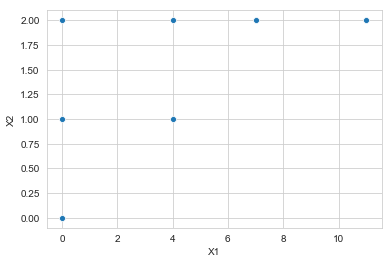

In [83]:
sns.scatterplot(x='X1', y='X2', data=df1)

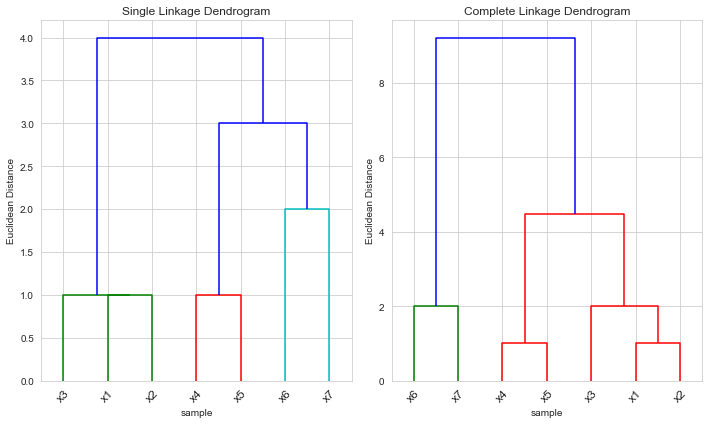

In [96]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# plot single linkage dendrogram
plt.subplot(1, 2, 1)
Z = linkage(df1[['X1', 'X2']], method='single', metric='Euclidean')
plt.title('Single Linkage Dendrogram')
plt.xlabel('sample')
plt.ylabel('Euclidean Distance')
dendrogram(Z, labels=['x'+str(i) for i in range(1, 8)], leaf_rotation=45)

# plot complete linkage dendrogram
plt.subplot(1, 2, 2)
Z = linkage(df1[['X1', 'X2']], method='complete', metric='Euclidean')
plt.title('Complete Linkage Dendrogram')
plt.xlabel('sample')
plt.ylabel('Euclidean Distance')
dendrogram(Z, labels=['x'+str(i) for i in range(1, 8)], leaf_rotation=45)

fig.tight_layout()

In this example, $A = {1, 2, 3}$ and $B ={4, 5}$ are indeed both clusters -- they are formed at height 1 in the simple linkage dendrogram and at height 2 in the complete linkage dendrogram. 

But in this case the height that they are fused is greater for the complete linkage than for the single linkage

$$h_{comp}(A, B) = 11 > h_{sing}(A, B) = 4$$

#### An example of $h_{comp} < h_{sing}$

We use the same observations from the last example, except the $x_7$ point changes $[11, 2] \mapsto [9, 2]$

In [91]:
df1.loc[7, 'X1'] = 9
df1

,X1,X2
1,0,0
2,0,1
3,0,2
4,4,1
5,4,2
6,7,2
7,9,2


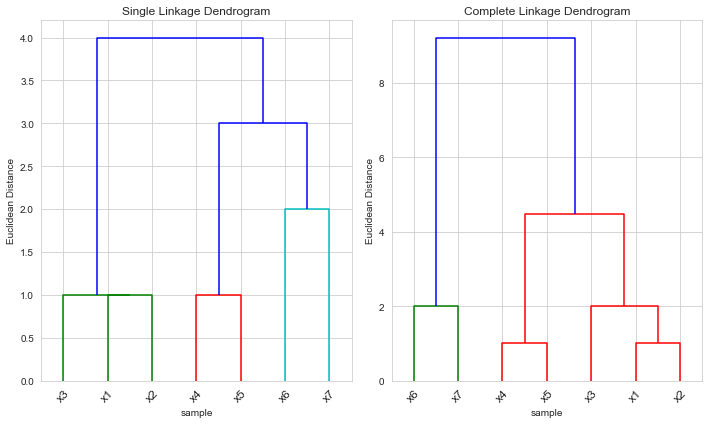

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# plot single linkage dendrogram
plt.subplot(1, 2, 1)
Z = linkage(df1[['X1', 'X2']], method='single', metric='Euclidean')
plt.title('Single Linkage Dendrogram')
plt.xlabel('sample')
plt.ylabel('Euclidean Distance')
dendrogram(Z, labels=['x'+str(i) for i in range(1, 8)], leaf_rotation=45)

# plot complete linkage dendrogram
plt.subplot(1, 2, 2)
Z = linkage(df1[['X1', 'X2']], method='complete', metric='Euclidean')
plt.title('Complete Linkage Dendrogram')
plt.xlabel('sample')
plt.ylabel('Euclidean Distance')
dendrogram(Z, labels=['x'+str(i) for i in range(1, 8)], leaf_rotation=45)

fig.tight_layout()

Again in this example, $A = {1, 2, 3}$ and $B ={4, 5}$ are indeed both clusters -- again they are formed at height 1 in the simple linkage dendrogram and at height 2 in the complete linkage dendrogram. 

But in this case the height that they are fused is greater for the single linkage than for the complete linkage

$$h_{comp}(A, B) = 2 < h_{sing}(A, B) = 4$$

## b. For clusters $\{5\}$, $\{6\}$

In this case, with singleton clusters $A = \{5\}$, $B = \{6\}$

$$d_{sing}(A, B) = d_{comp}(A, B) = d(5, 6)$$

so $A, B$ are fused when in the single linkage diagram when 

$$d(5, 6) \leqslant \underset{clusters\ C}{\min}\{\min{d(5, c)} | c \in C\}$$

and in the complete linkage diagram when 

$$d(5, 6) \leqslant \underset{clusters\ C}{\min}\{\max{d(5, c)} | c \in C\}$$

so necessarily

$$h_{comp}(A, B) \geqslant h_{sing}(A, B)$$

## Exercise 5: $K$-means clustering in fig 10.14

For the left-hand scaling, we would expect the orange customer in a cluster by themselves, and the other 7 customers in the other. The orange customer has a minimum distance of 3 from any other customer, and all other 7 customers are a distance one away from some other customer in that group.

For the middle scaling, we would expect to see the customers that bought computers (yellow, blue, red, magenta) in one cluster and the others in the other.

For the right-hand scaling, we would expect to see the same as for the middle scaling.

We can verify these expectations with a computation

### Left-hand scaling

In [142]:
customers = ['black', 'orange', 'lt_blue', 'green', 'yellow', 'dk_blue',
             'red', 'magenta']
purchases = [[8, 0], [11, 0], [7, 0], [6, 0], [5, 1], [6, 1], [7, 1], 
               [8, 1]]
df_left = pd.DataFrame(purchases, columns=['socks', 'computers'], index=customers)
df_left

,socks,computers
black,8,0
orange,11,0
lt_blue,7,0
green,6,0
yellow,5,1
dk_blue,6,1
red,7,1
magenta,8,1


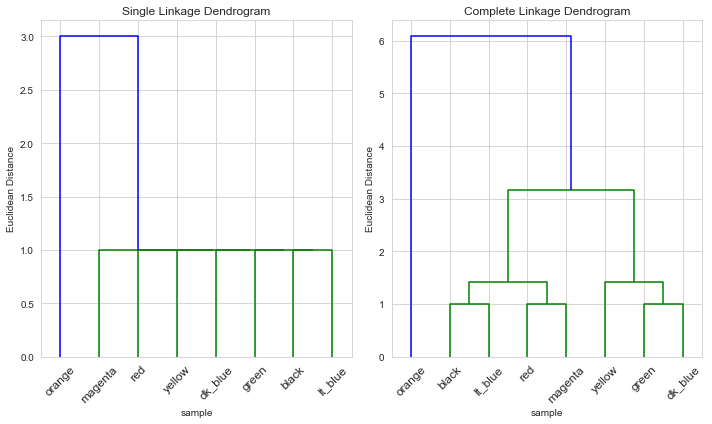

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# plot single linkage dendrogram
plt.subplot(1, 2, 1)
Z = linkage(df_left, method='single', metric='Euclidean')
plt.title('Single Linkage Dendrogram')
plt.xlabel('sample')
plt.ylabel('Euclidean Distance')
dendrogram(Z, labels=customers, leaf_rotation=45)

# plot complete linkage dendrogram
plt.subplot(1, 2, 2)
Z = linkage(df_left, method='complete', metric='Euclidean')
plt.title('Complete Linkage Dendrogram')
plt.xlabel('sample')
plt.ylabel('Euclidean Distance')
dendrogram(Z, labels=customers, leaf_rotation=45)

fig.tight_layout()

For both single and complete linkages, the clusters were as expected

### Middle scaling

We don't get the same plot as the book whether we scale by the standard deviation (or the variance) so we'll code this by hand again (with a bit of guesswork)

In [133]:
df_mid = df/df.std()
df_mid.loc[:, 'socks'] = [1.0, 1.4, 0.9, 0.78, 0.62, 0.78, 0.9, 1.0]
df_mid.loc[:, 'computers'] = [0, 0, 0, 0, 1.4, 1.4, 1.4, 1.4]
df_mid

,socks,computers
black,1.00,0.0
orange,1.40,0.0
lt_blue,0.90,0.0
green,0.78,0.0
yellow,0.62,1.4
dk_blue,0.78,1.4
red,0.90,1.4
magenta,1.00,1.4


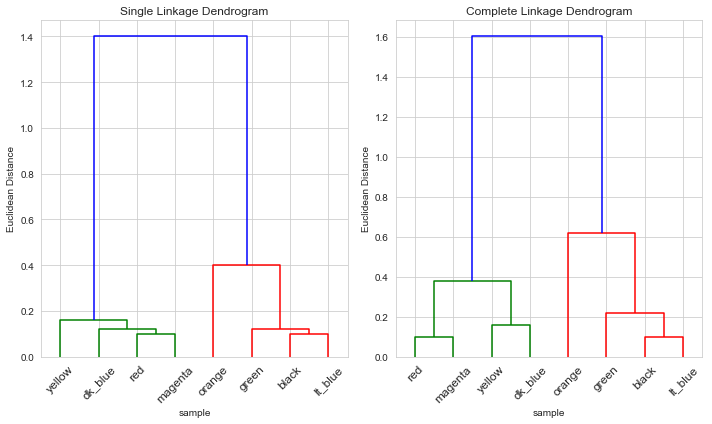

In [134]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# plot single linkage dendrogram
plt.subplot(1, 2, 1)
Z = linkage(df_mid, method='single', metric='Euclidean')
plt.title('Single Linkage Dendrogram')
plt.xlabel('sample')
plt.ylabel('Euclidean Distance')
dendrogram(Z, labels=customers, leaf_rotation=45)

# plot complete linkage dendrogram
plt.subplot(1, 2, 2)
Z = linkage(df_mid, method='complete', metric='Euclidean')
plt.title('Complete Linkage Dendrogram')
plt.xlabel('sample')
plt.ylabel('Euclidean Distance')
dendrogram(Z, labels=customers, leaf_rotation=45)

fig.tight_layout()

For both single and complete linkages, the clusters were again as expected

### Right-hand scaling

We'll assume $\$2$ per pair of socks, and $\$2000$ per computer

In [144]:
df_right = df_left.copy()
df_right.loc[:, 'socks'] = 2 * df_right['socks']
df_right.loc[:, 'computers'] = 2000 * df_right['computers']
df_right

,socks,computers
black,16,0
orange,22,0
lt_blue,14,0
green,12,0
yellow,10,2000
dk_blue,12,2000
red,14,2000
magenta,16,2000


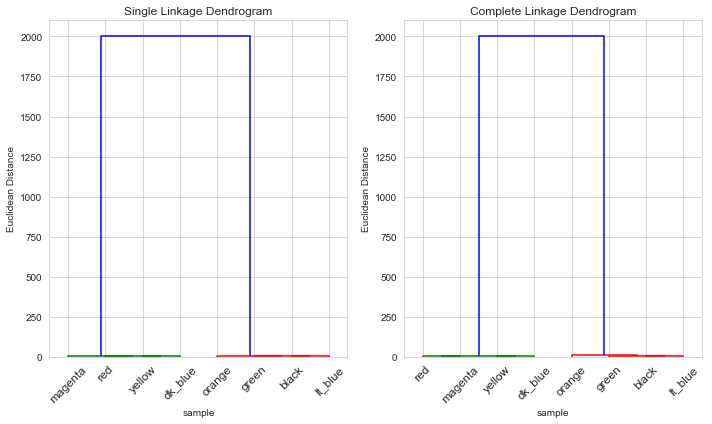

In [145]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

# plot single linkage dendrogram
plt.subplot(1, 2, 1)
Z = linkage(df_right, method='single', metric='Euclidean')
plt.title('Single Linkage Dendrogram')
plt.xlabel('sample')
plt.ylabel('Euclidean Distance')
dendrogram(Z, labels=customers, leaf_rotation=45)

# plot complete linkage dendrogram
plt.subplot(1, 2, 2)
Z = linkage(df_right, method='complete', metric='Euclidean')
plt.title('Complete Linkage Dendrogram')
plt.xlabel('sample')
plt.ylabel('Euclidean Distance')
dendrogram(Z, labels=customers, leaf_rotation=45)

fig.tight_layout()

Again for both single and complete linkages, the clusters were as expected

## Exercise 6: A case of PCA

### a.

This means that the proportion of variance explained by the first principal component is 0.10. That is, the ratio of the (sample) variance of the first component to the total (sample) variance is 0.10